<div align="center">

#  Нелинейная регрессия
## Переход от прямой линии к кривой: полиномиальная регрессия

</div>

---


### Полиномиальная регрессия

* Если зависимость между признаками и откликом **нелинейная**, можно использовать **полиномиальную регрессию**:

$$
y = w_1x + w_2x^2 + \dots + w_dx^d + b
$$

* $d$ — степень многочлена.
* Несмотря на «нелинейность» по $x$, модель остаётся **линейной по коэффициентам** $w$.

---

**Пример в scikit-learn:**

* `PolynomialFeatures(d=2)` добавляет квадратичный член ($x^2$) к данным.
* Затем обучаем обычную линейную регрессию.
* Сравниваем точность линейной и полиномиальной моделей.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

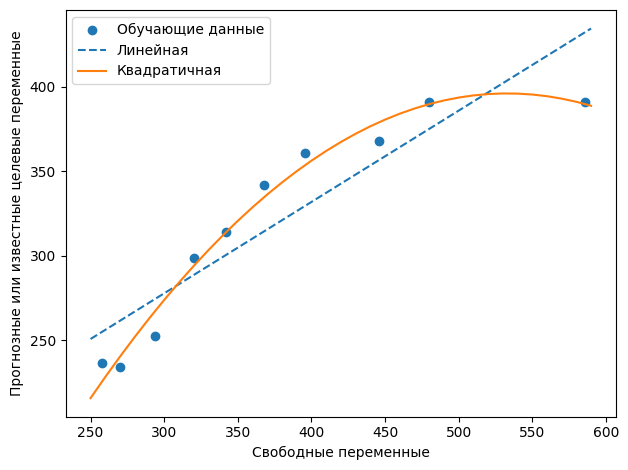

Обучение MSE, линейная: 569.78
Обучение MSE, квадратичная: 61.33
Обучение R^2, линейная: 0.83
Обучение R^2, квадратичная: 0.98


In [9]:
# Добавим Полиномиальный член второй степени

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X)

# Обучим простую модель линейной регрессии
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Обучим модель полиномиальной регрессии
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Отобразим результаты на графике
plt.scatter(X, y, label = 'Обучающие данные')
plt.plot(X_fit, y_lin_fit,
         label = 'Линейная', linestyle = '--')
plt.plot(X_fit, y_quad_fit,
         label = 'Квадратичная')
plt.xlabel('Свободные переменные')
plt.ylabel('Прогнозные или известные целевые переменные')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Вычеслим оценочные метрики MSE и R^2
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Обучение MSE, линейная: {mse_lin:.2f}')
print(f'Обучение MSE, квадратичная: {mse_quad:.2f}')
r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Обучение R^2, линейная: {r2_lin:.2f}')
print(f'Обучение R^2, квадратичная: {r2_quad:.2f}')

Как можно видеть, `MSE` уменьшилось с 570 **(линейная аппроксимация)** до 61 **(квадратичная аппроксимация)**, кромме того коэффицент смешанной корреляции (детерминации) отражает более точное соответствие **квадратичной модели $(R^2 = 0.98)$** по сравнению с **линейной моделью $(R^2 = 0.83)$** в данной демонстрационной задаче.


---

<div align="center">

## Моделирование нелинейных отношений в наборе данных Ames Housing

</div>

Смоделируем взаимосвязь между ценой продажи и жилой площадью над землей, используя полиномы **второй степени (квадратичные)** и **третьей степени (кубические)** и сравним результаты с линейной моделью.

In [14]:
# Загрузка данных
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep = '\t',
                 usecols = columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [15]:
# Преобразование категориальной переменной через .map()
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [16]:
# Проверка фрейма на пропущенные значения
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [17]:
# Удалим строку с пропущенным значением, так как у нас их много
df = df.dropna(axis = 0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [18]:
# Удалим 3 выброса с жилой площадью более 4000 кв.футов, чтобы
# эти выбросы не искажали наше регрессионное приближение
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

In [19]:
# Обучим регрессионные модели
regr = LinearRegression()

# Создадим квадратичные и кубические признаки
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [22]:
# Обучаем регрессии на признаках
# Создаём массив точек для построения линии предсказаний (от мин. до макс. X с шагом 1)
X_fit = np.arange(X.min() - 1, X.max() + 2, 1)[:, np.newaxis]

# --- Линейная регрессия ---
regr = regr.fit(X, y)                   # обучаем модель на исходных признаках X
y_lin_fit = regr.predict(X_fit)         # предсказываем значения на сетке X_fit
linear_r2 = r2_score(y, regr.predict(X)) # вычисляем R² на исходных данных

# --- Квадратичная регрессия (d=2) ---
regr = regr.fit(X_quad, y)                      # обучаем модель на признаках с добавленным x²
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))  
quadratic_r2 = r2_score(y, regr.predict(X_quad))           # вычисляем R² для квадратичной модели

# --- Кубическая регрессия (d=3) ---
regr = regr.fit(X_cubic, y)                     # обучаем модель на признаках с добавленным x² и x³
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))     # предсказываем значения на сетке
cubic_r2 = r2_score(y, regr.predict(X_cubic))              # вычисляем R² для кубической модели


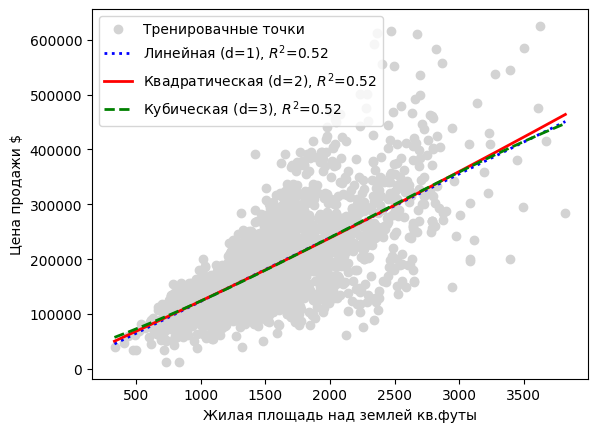

In [24]:
# Выводим результаты на график
plt.scatter(X, y, label = 'Тренировачные точки', 
            color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
         label = f'Линейная (d=1), $R^2$={linear_r2:.2f}',
         color = 'blue',
         lw = 2,
         linestyle = ':')
plt.plot(X_fit, y_quad_fit,
         label = f'Квадратическая (d=2), $R^2$={quadratic_r2:.2f}',
         color = 'red',
         lw = 2,
         linestyle = '-')
plt.plot(X_fit, y_cubic_fit,
         label = f'Кубическая (d=3), $R^2$={cubic_r2:.2f}',
         color = 'green',
         lw = 2,
         linestyle = '--')
plt.xlabel('Жилая площадь над землей кв.футы')
plt.ylabel('Цена продажи $')
plt.legend(loc = 'upper left')
plt.show()

Очевидно, что использование **квадратичных** или **кубических** признаков не дает эффекта, поскольку связь между переменными все равно выглядит линейной. Рассмотрим другой признак `Overall Qual` (общее качество материалов и отделки домов от 1 до 10).


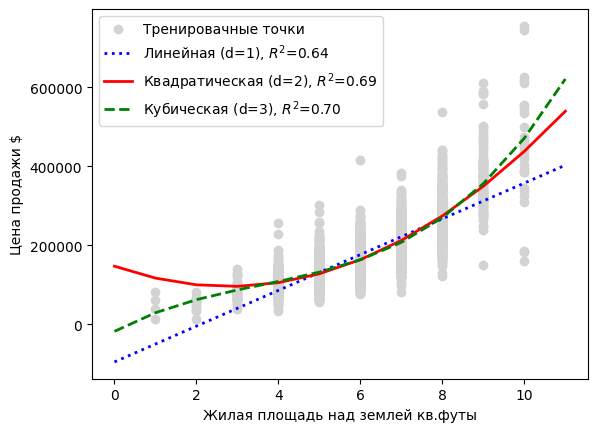

In [25]:
# Удалим 3 выброса с жилой площадью более 4000 кв.футов, чтобы
# эти выбросы не искажали наше регрессионное приближение
X = df[['Overall Qual']].values
y = df['SalePrice'].values


# Обучим регрессионные модели
regr = LinearRegression()

# Создадим квадратичные и кубические признаки
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Обучаем регрессии на признаках
# Создаём массив точек для построения линии предсказаний (от мин. до макс. X с шагом 1)
X_fit = np.arange(X.min() - 1, X.max() + 2, 1)[:, np.newaxis]

# --- Линейная регрессия ---
regr = regr.fit(X, y)                   # обучаем модель на исходных признаках X
y_lin_fit = regr.predict(X_fit)         # предсказываем значения на сетке X_fit
linear_r2 = r2_score(y, regr.predict(X)) # вычисляем R² на исходных данных

# --- Квадратичная регрессия (d=2) ---
regr = regr.fit(X_quad, y)                      # обучаем модель на признаках с добавленным x²
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))  
quadratic_r2 = r2_score(y, regr.predict(X_quad))           # вычисляем R² для квадратичной модели

# --- Кубическая регрессия (d=3) ---
regr = regr.fit(X_cubic, y)                     # обучаем модель на признаках с добавленным x² и x³
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))     # предсказываем значения на сетке
cubic_r2 = r2_score(y, regr.predict(X_cubic))              # вычисляем R² для кубической модели

# Выводим результаты на график
plt.scatter(X, y, label = 'Тренировачные точки', 
            color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
         label = f'Линейная (d=1), $R^2$={linear_r2:.2f}',
         color = 'blue',
         lw = 2,
         linestyle = ':')
plt.plot(X_fit, y_quad_fit,
         label = f'Квадратическая (d=2), $R^2$={quadratic_r2:.2f}',
         color = 'red',
         lw = 2,
         linestyle = '-')
plt.plot(X_fit, y_cubic_fit,
         label = f'Кубическая (d=3), $R^2$={cubic_r2:.2f}',
         color = 'green',
         lw = 2,
         linestyle = '--')
plt.xlabel('Жилая площадь над землей кв.футы')
plt.ylabel('Цена продажи $')
plt.legend(loc = 'upper left')
plt.show()

Как видно на графике, **квадратическая** и **кубическая** аппроксимация лучше отражают взаимосвязь между ценой и общим качеством дома, чем линейная апроксимация.

> Нужно учитывать, что добавление большого кол-ва полиномиальных признаков усложняет модель и увеличивает вероятность переобучения. Поэтому следует проверять производительность модели на отдельном тестовом наборе данных, чтобы оценить качество обобщения.

---

<div align="center">

## Моделирование нелинейных отношений c использованием случайных лесов
### Регрессия на основе алгоритма дерева решений

</div>


### Деревья решений: классификация и регрессия

**Плюсы:**

* Работают с любыми признаками (числовыми, категориальными).
* Не требуют нормализации или стандартизации.
* Хорошо подходят для **нелинейных зависимостей**.


#### Построение дерева

* Дерево растёт, пока листья не станут «чистыми» или не выполнится критерий остановки.
* В каждом узле ищется признак и порог, которые **лучше всего разделяют данные**.


#### Для классификации

* Используются **энтропия** или **индекс Джини** как меры примеси.
* Цель: найти разбиение, которое **максимизирует прирост информации** (Information Gain).


#### Для регрессии

**Идея:**

* Узлы дерева делят данные так, чтобы уменьшить **разброс (дисперсию)** целевой переменной в каждом узле.
* Лист дерева прогнозирует значение $y$ как среднее всех целевых значений в этом узле.

* Вместо энтропии берём **MSE (среднеквадратичная ошибка)** внутри узла:

$$
I(t) = MSE(t) = \frac{1}{N_t} \sum_{i \in D_t} \big(y^{(i)} - \hat{y}_t\big)^2
$$

**Формула для прогнозируемого значения в узле $t$:**

$$
\hat{y}_t = \frac{1}{N_t} \sum_{i \in D_t} y^{(i)}
$$

где $D_t$ — множество обучающих примеров в узле $t$, $N_t$ — их количество.

**Принцип разбиения:**

* Выбираем признак и порог, которые **максимально уменьшают дисперсию** в дочерних узлах.

Text(0, 0.5, 'Цена продажи $')

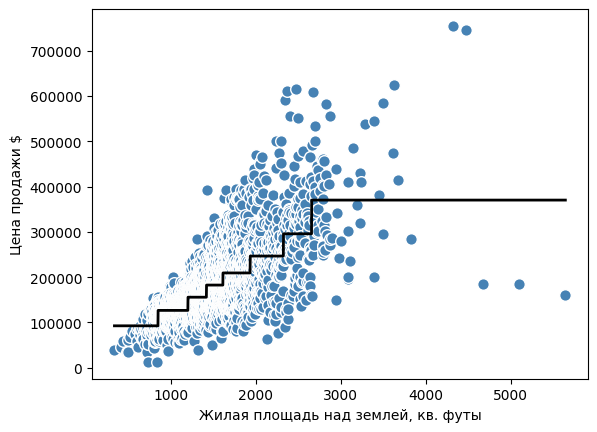

In [29]:
# Смоделируем взаимосвязь, не обязательно демонстрируют
# нелинейную связь, но это комбинация хорошо иллюстрирует
# общие аспекты дерева регресии
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)
    
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Жилая площадь над землей, кв. футы')
plt.ylabel('Цена продажи $')

### Дерево решений для регрессии

* Хорошо **ловит общие тенденции** в данных, даже если они нелинейные.
* **Ограничения:**

  * Прогнозы **не непрерывны** и **не дифференцируемы**.
  * Нужно правильно выбирать **глубину дерева**: слишком большое → переобучение, слишком маленькое → недообучение.
* Пример: глубина 3 подошла для текущих данных.
* Если зависимость почти линейная (как Living Area → SalePrice), можно применять дерево к **другим признакам**, где связь более сложная (например, Overall Qual).

---

<div align="center">

## Регрессия на основе случайного леса

</div>


**Что это:**

* Ансамблевый метод, объединяющий множество деревьев решений.
* Каждое дерево обучается на случайной подвыборке данных и признаков, что добавляет **случайность** и снижает дисперсию модели.

**Плюсы:**

1. **Лучшее обобщение**, чем у одного дерева решений.
2. **Стабилен к выбросам** — отдельные аномальные точки не сильно влияют на прогноз.
3. **Меньше подвержен переобучению**, чем отдельное дерево.
4. **Минимальная настройка параметров** — обычно достаточно подобрать число деревьев.

**Основной параметр:**

* **Количество деревьев в лесу**: больше деревьев → стабильнее прогноз, но выше вычислительные затраты.

**Как работает для регрессии:**

* Критерий разбиения каждого дерева – **MSE** (сумма квадратов ошибок).
* Прогноз **вычисляется как среднее значение предсказаний всех деревьев**.
* Алгоритм почти идентичен классификационному случайному лесу, отличие только в том, что цель – непрерывная переменная, а не категория.

In [32]:
# Обучим нашу модель на всех признаках из 
# набора данных Ames Housing

target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 123)

forest = RandomForestRegressor(
    n_estimators = 1000,
    criterion = 'squared_error',
    random_state = 1,
    n_jobs = -1
)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE при обучении: {mae_train:.2f}')
print(f'MAE при тесте: {mae_test:.2f}')
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R^2 при обучении: {r2_train:.2f}')
print(f'R^2 при тесте: {r2_test:.2f}')

MAE при обучении: 8305.18
MAE при тесте: 20821.77
R^2 при обучении: 0.98
R^2 при тесте: 0.85


Видно, что **случайный лес** склонен к переобучению на обучающих данных. Тем не менее он все ещё может хорошо объяснять взяимосвязь между целевыми и независимыми переменными $R^2 = 0.85$, для сравнения линейная модель на том же наборе данных меньше переобучалась, но хуже объясняла незнакомые данные $R^2 = 0.75$.

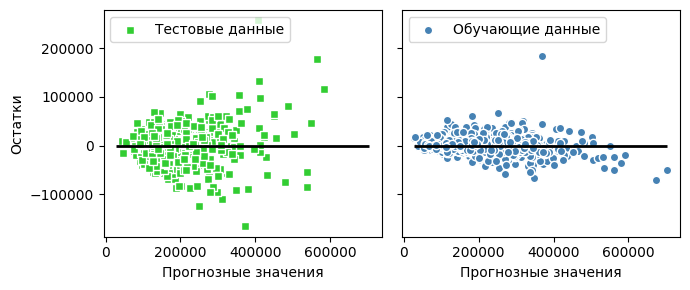

In [34]:
# График остатков
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3), sharey = True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Тестовые данные')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c = 'steelblue', marker = 'o', edgecolor = 'white',
            label = 'Обучающие данные')
ax1.set_ylabel('Остатки')

for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозные значения')
    ax.legend(loc = 'upper left')
    ax.hlines(y = 0, xmin = x_min - 100, xmax = x_max + 100,
              color = 'black', lw = 2)
plt.tight_layout()
plt.show()

### Анализ графика остатков для модели

* На тестовых данных **модель работает хуже**, о чём говорят выбросы и неслучайное распределение остатков.
* **Идеал:** ошибки должны быть случайными и не зависеть от признаков.
* **Если ошибки закономерны**, значит, модель **не использовала всю полезную информацию** (информация «просочилась» в остатки).
* **Улучшение модели:**

  * преобразование переменных,
  * настройка гиперпараметров,
  * выбор более подходящей модели.

---


# Итоги по регрессии

1. **Линейная регрессия:**

   * Моделирование связи между одной независимой переменной и непрерывным откликом.
   * как реализовать линейную регрессию через градиентный спуск.
   * как использовать **линейные модели в `scikit-learn`**, которые минимизируют          MSE аналитически.

2. **Exploratory Data Analysis (EDA):**

   * Выявление закономерностей и аномалий — первый шаг в прогнозном моделировании.

3. **Устойчивость к выбросам:**

   * Использование метода RANSAC для обучения на «хороших» данных (inliers).

4. **Оценка модели:**

   * Метрики: MSE, MAE, R².
   * График остатков для диагностики ошибок и закономерностей.

5. **Регуляризация:**

   * Уменьшение сложности модели и предотвращение переобучения.
   * Методы: Ridge (L2), LASSO (L1), ElasticNet (L1 + L2).

6. **Моделирование нелинейных отношений:**

   * Полиномиальные признаки.
   * Деревья решений и случайные леса для выявления сложных зависимостей.
